In [51]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

!pip install seaborn as sns

     |████████████████████████████████| 285 kB 4.1 MB/s eta 0:00:01
  Created wheel for sns: filename=sns-0.1-py3-none-any.whl size=2661 sha256=814acb79937f9ae18a90bb307aca00134c6d158728fc63c48478a65ba4b7f2d2
  Stored in directory: /home/jovyan/.cache/pip/wheels/91/7f/88/5d7e4dd91a12f7bb860a61699096a9696076bf93a9fe2b1132
Successfully built sns


In [4]:
data = pd.read_csv('training_mush.csv')

In [5]:
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [13]:
X_train = data.drop(['class'], axis = 1)
y_train = data['class']

In [29]:
rf = RandomForestClassifier(random_state = 0)


In [30]:
parametrs = {'n_estimators': [10, 20, 30, 40, 50],
            'max_depth': range(1,12,2),
            'min_samples_leaf': range(2,7),
            'min_samples_split': range(2,9,2)}

In [32]:
search_grid_rf = GridSearchCV(rf, parametrs, cv = 3, n_jobs=-1)
search_grid_rf.fit(X_train, y_train)
search_grid_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 30}

In [34]:
best_rf = RandomForestClassifier(n_estimators = 30, max_depth = 9, min_samples_leaf = 2, min_samples_split = 2)

In [39]:
test_data = pd.read_csv('testing_mush.csv')
best_rf.fit(X_train, y_train)

n = 0
for i in best_rf.predict(test_data):
    if i == 1:
        n += 1
n

976

In [46]:
y_true = pd.read_csv('testing_y_mush.csv')
y_pred = pd.DataFrame({'class' : best_rf.predict(test_data)})

In [53]:
import seaborn as sns

<AxesSubplot:>

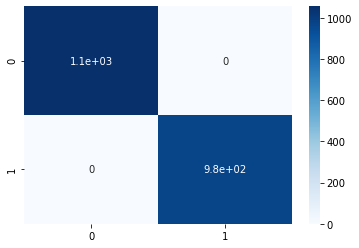

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues")